# Africa Credit Challenge


In [14]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost imbalanced-learn lightgbm catboost optuna


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Marius\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [15]:
# === Import Libraries ===
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Machine Learning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Advanced ML Models
import optuna  # For hyperparameter optimization
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Settings
import warnings
warnings.filterwarnings('ignore')

## Load and Inspect the data

In [16]:
# %% [code]
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
economic_indicators = pd.read_csv('economic_indicators.csv')

# Display the first few rows and summary of the dataset to understand its structure
economic_indicators.head(), economic_indicators.info()


print("Train dataset :")
display(train.head())
print(train.shape)

print("\nTest dataset :")
display(test.head())
print(test.shape)

print("\nColonnes et types dans le train :")
train.info()

print(f"\nNombre total de valeurs manquantes dans le train : {train.isna().sum().sum()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    27 non-null     object 
 1   Indicator  27 non-null     object 
 2   YR2001     20 non-null     float64
 3   YR2002     20 non-null     float64
 4   YR2003     20 non-null     float64
 5   YR2004     20 non-null     float64
 6   YR2005     24 non-null     float64
 7   YR2006     24 non-null     float64
 8   YR2007     24 non-null     float64
 9   YR2008     24 non-null     float64
 10  YR2009     24 non-null     float64
 11  YR2010     24 non-null     float64
 12  YR2011     24 non-null     float64
 13  YR2012     24 non-null     float64
 14  YR2013     24 non-null     float64
 15  YR2014     24 non-null     float64
 16  YR2015     21 non-null     float64
 17  YR2016     21 non-null     float64
 18  YR2017     21 non-null     float64
 19  YR2018     17 non-null     float64
 20  YR2019     1

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0


(68654, 16)

Test dataset :


,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,7,Repeat Loan,575.7,0.300000,597.0
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.0,2153.0,2022-11-16,2022-11-23,7,Repeat Loan,0.0,0.000000,0.0
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.0,8304.0,2022-08-24,2022-08-31,7,Repeat Loan,207.0,0.025079,208.0
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.0,3379.0,2022-11-15,2022-11-22,7,Repeat Loan,1013.7,0.300000,1014.0
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.0,120.0,2022-11-10,2022-11-17,7,Repeat Loan,36.0,0.300000,36.0


(18594, 15)

Colonnes et types dans le train :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender    

In [17]:
# Check column types & missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_portion_F

In [18]:
# Are there missing values in the train dataset ?
print(f"There are {train.isna().sum().sum()} missing values in the data.")

There are 0 missing values in the data.


### EDA

In [19]:
def plot_continuous(df, column, transform=None):
    """
    Creates visualization for continuous variables with optional transformations.
    
    Parameters:
    df (DataFrame): Input dataframe
    column (str): Column name to visualize
    transform (str): Type of transformation ('log' or 'sqrt')
    """
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    
    # Original data plots
    sns.histplot(df[column], kde=True, ax=axs[0, 0])
    axs[0, 0].set_title(f'Distribution of {column}')
    axs[0, 0].set_xlabel(column)

    sns.boxplot(y=df[column], ax=axs[1, 0])
    axs[1, 0].set_title(f'Box Plot of {column}')
    axs[1, 0].set_ylabel(column)

    if transform == 'log':
        transformed_data = np.log1p(df[column])
        transform_label = 'Log'
    elif transform == 'sqrt':
        transformed_data = np.sqrt(df[column])
        transform_label = 'Square Root'
    else:
        transformed_data = None

    if transformed_data is not None:
        sns.histplot(transformed_data, kde=True, ax=axs[0, 1])
        axs[0, 1].set_title(f'{transform_label} Distribution of {column}')
        axs[0, 1].set_xlabel(f'{transform_label}({column})')

        sns.boxplot(y=transformed_data, ax=axs[1, 1])
        axs[1, 1].set_title(f'{transform_label} Box Plot of {column}')
        axs[1, 1].set_ylabel(f'{transform_label}({column})')
    else:
        for ax in [axs[0, 1], axs[1, 1]]:
            ax.remove()

    plt.tight_layout()
    plt.show()

def plot_categorical(df, column):
    """
    Creates visualization for categorical variables.
    
    Parameters:
    df (DataFrame): Input dataframe
    column (str): Column name to visualize
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    value_counts = df[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax1)
    ax1.set_title(f'Bar Plot of {column}')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=45)

    ax2.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
    ax2.set_title(f'Pie Chart of {column}')

    plt.tight_layout()
    plt.show()

#### Categorical exploration

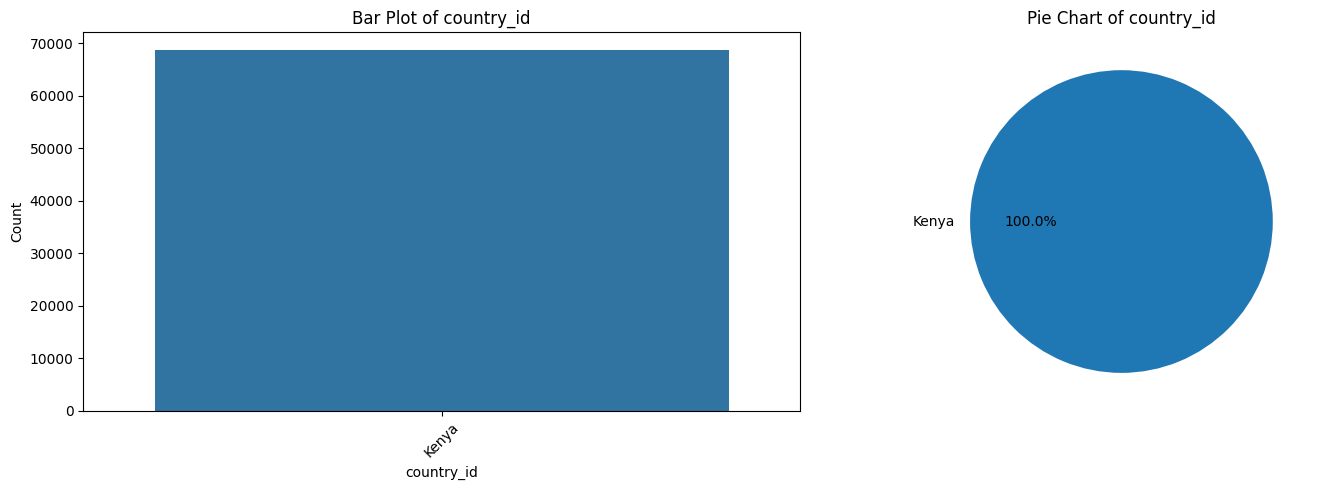

In [20]:
plot_categorical(train, 'country_id')

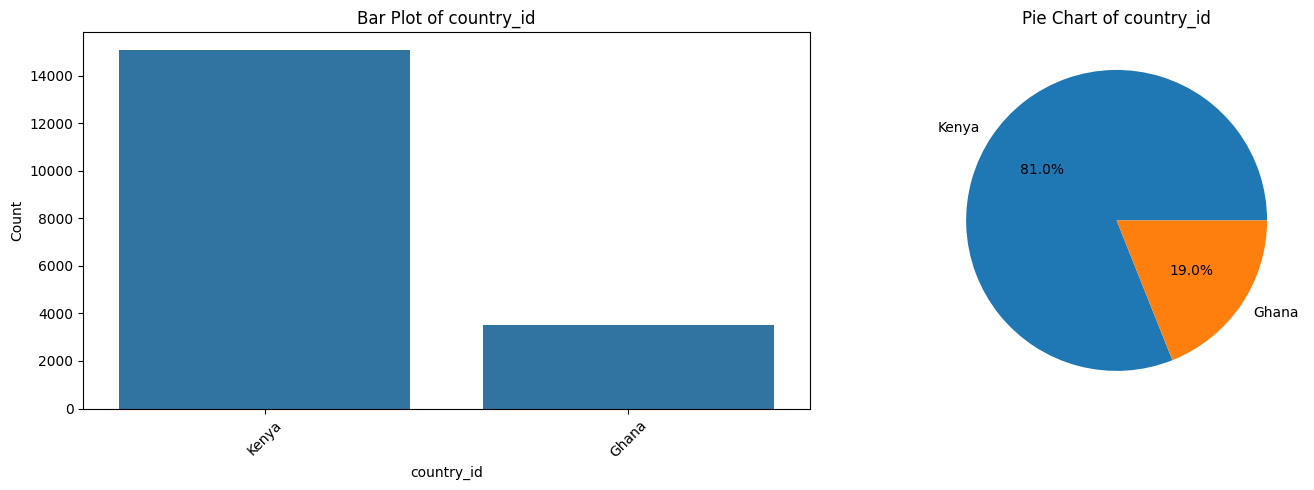

In [8]:
plot_categorical(test, 'country_id')

##### This shows that test has a new country, ghana so one of the goals is to build a solution that can generalize well in new regions

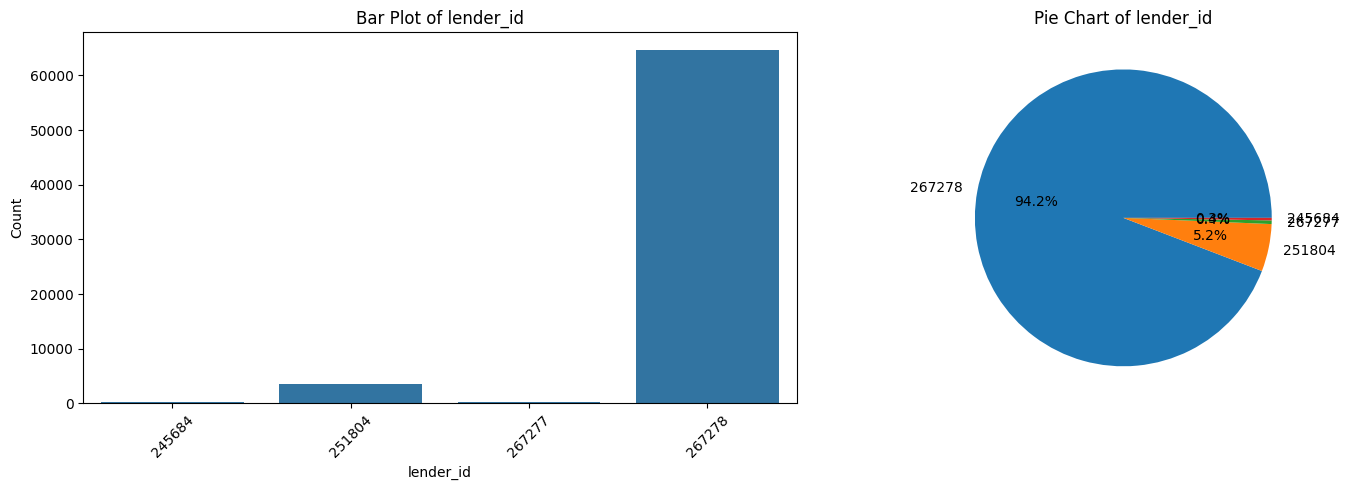

In [9]:
plot_categorical(train, 'lender_id')

##### You can exploree more of the categorical columns as well

#### TARGET EXPLORATION


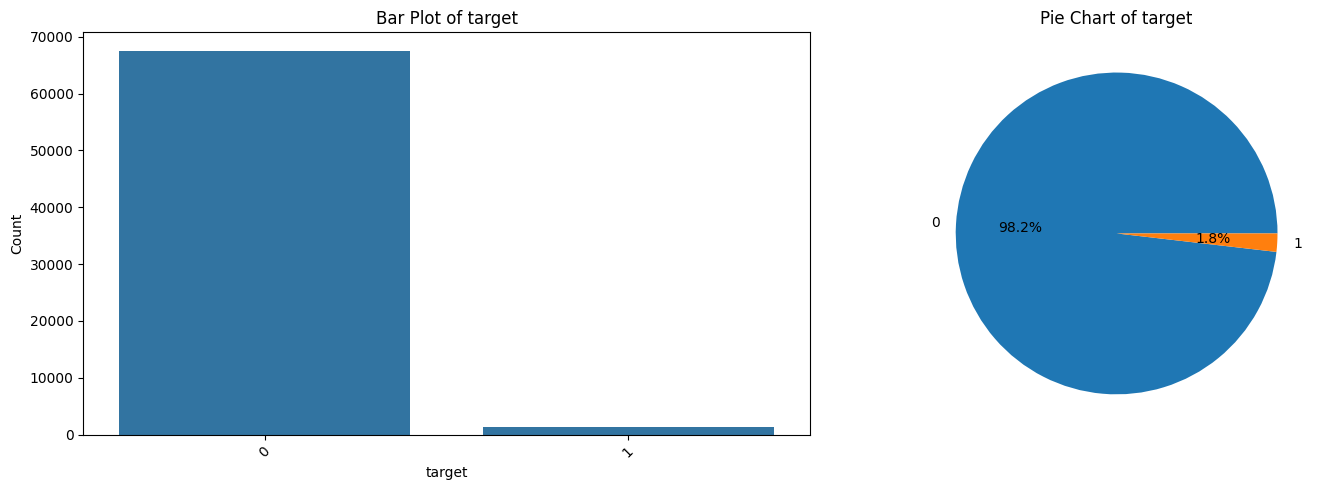

In [10]:
plot_categorical(train, 'target')

##### You can see the dataset is highly imbalanced , and this is expected in loan default scenarios, So find  ways to deal with the  imbalance

### CONTINUOUS COLUMN EXPLORATION

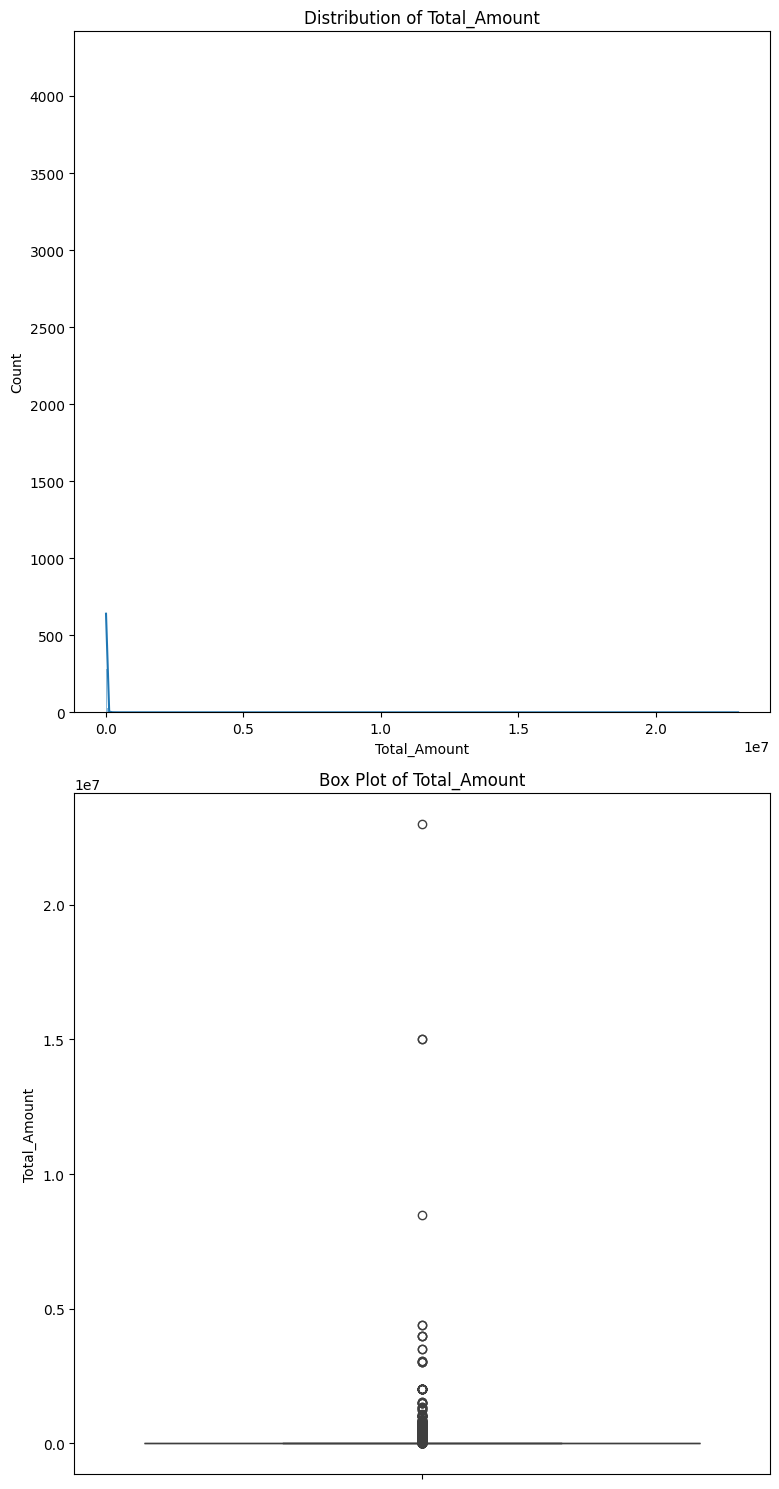

In [11]:
plot_continuous(train, 'Total_Amount')

Are those outliers?
##### You can explore more of the given numerical columns as well

### Feature Engineering
* So here we are going to concatenate both the train and test so that we can do the processing once instead of repeating for each

In [21]:
# Combine datasets for consistent feature engineering
data = pd.concat([train, test]).reset_index(drop=True)

# Convert date columns to datetime
data['disbursement_date'] = pd.to_datetime(data['disbursement_date'], errors='coerce')
data['due_date'] = pd.to_datetime(data['due_date'], errors='coerce')

# Extract temporal features from dates
date_cols = ['disbursement_date', 'due_date']
for col in date_cols:
    data[col] = pd.to_datetime(data[col])
    # Extract month, day, year
    data[col+'_month'] = data[col].dt.month
    data[col+'_day'] = data[col].dt.day
    data[col+'_year'] = data[col].dt.year
    # Calculate loan term and weekday features
    data[f'loan_term_days'] = (data['due_date'] - data['disbursement_date']).dt.days
    data[f'disbursement_weekday'] = data['disbursement_date'].dt.weekday
    data[f'due_weekday'] = data['due_date'].dt.weekday

# Create financial ratios and transformations
data['repayment_ratio'] = data['Total_Amount_to_Repay'] / data['Total_Amount']
data['log_Total_Amount'] = np.log1p(data['Total_Amount'])



# Handle categorical variables
cat_cols = data.select_dtypes(include='object').columns
# One-hot encoding for loan type
data = pd.get_dummies(data, columns=['loan_type'], prefix='loan_type', drop_first=False)
loan_type_cols = [col for col in data.columns if col.startswith('loan_type_')]
data[loan_type_cols] = data[loan_type_cols].astype(int)

# Label encoding for other categorical columns
le = LabelEncoder()
for col in [col for col in cat_cols if col not in ['loan_type', 'ID']]:
    data[col] = le.fit_transform(data[col])

# Split back into train and test
train_df = data[data['ID'].isin(train['ID'].unique())]
test_df = data[data['ID'].isin(test['ID'].unique())]

# Define features for modeling
features_for_modelling = [col for col in train_df.columns if col not in date_cols + ['ID', 'target', 'country_id']]

print(f"The shape of train_df is: {train_df.shape}")
print(f"The shape of test_df is: {test_df.shape}")
print(f"The shape of train is: {train.shape}")
print(f"The shape of test is: {test.shape}")
print(f"The features for modelling are:\n{features_for_modelling}")


The shape of train_df is: (68654, 50)
The shape of test_df is: (18594, 50)
The shape of train is: (68654, 16)
The shape of test is: (18594, 15)
The features for modelling are:
['customer_id', 'tbl_loan_id', 'lender_id', 'Total_Amount', 'Total_Amount_to_Repay', 'duration', 'New_versus_Repeat', 'Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_portion_to_be_repaid', 'disbursement_date_month', 'disbursement_date_day', 'disbursement_date_year', 'loan_term_days', 'disbursement_weekday', 'due_weekday', 'due_date_month', 'due_date_day', 'due_date_year', 'repayment_ratio', 'log_Total_Amount', 'loan_type_Type_1', 'loan_type_Type_10', 'loan_type_Type_11', 'loan_type_Type_12', 'loan_type_Type_13', 'loan_type_Type_14', 'loan_type_Type_15', 'loan_type_Type_16', 'loan_type_Type_17', 'loan_type_Type_18', 'loan_type_Type_19', 'loan_type_Type_2', 'loan_type_Type_20', 'loan_type_Type_21', 'loan_type_Type_22', 'loan_type_Type_23', 'loan_type_Type_24', 'loan_type_Type_3', 'loan_type_Type_4', 'lo

In [22]:
# Étape 1 : Création de nouvelles variables
train_df['new_implicit_interest_rate'] = (train_df['Total_Amount_to_Repay'] - train_df['Total_Amount']) / train_df['Total_Amount']
test_df['new_implicit_interest_rate'] = (test_df['Total_Amount_to_Repay'] - test_df['Total_Amount']) / test_df['Total_Amount']

train_df['new_loans_per_customer'] = train_df.groupby('customer_id')['tbl_loan_id'].transform('count')
test_df['new_loans_per_customer'] = test_df.groupby('customer_id')['tbl_loan_id'].transform('count')

train_df['new_total_amount_by_customer'] = train_df.groupby('customer_id')['Total_Amount'].transform('sum')
test_df['new_total_amount_by_customer'] = test_df.groupby('customer_id')['Total_Amount'].transform('sum')

train_df['new_amount_duration_interaction'] = train_df['Total_Amount'] * train_df['duration']
test_df['new_amount_duration_interaction'] = test_df['Total_Amount'] * test_df['duration']

train_df['new_lender_funding_interaction'] = train_df['Lender_portion_Funded'] * train_df['lender_id']
test_df['new_lender_funding_interaction'] = test_df['Lender_portion_Funded'] * test_df['lender_id']

# Étape 2 : Mapping des pays et extraction de l'année
country_mapping = {
    '1': 'Kenya',
    '2': 'Ghana',
    '3': "Cote d'Ivoire"
}

# Mapper country_id aux noms des pays
train_df['Country'] = train_df['country_id'].astype(str).map(country_mapping)
test_df['Country'] = test_df['country_id'].astype(str).map(country_mapping)

# Extraire l'année depuis disbursement_date
train_df['Year'] = pd.to_datetime(train_df['disbursement_date'], errors='coerce').dt.year
test_df['Year'] = pd.to_datetime(test_df['disbursement_date'], errors='coerce').dt.year

# Étape 3 : Préparation des indicateurs économiques
economic_indicators_melted = economic_indicators.melt(
    id_vars=['Country', 'Indicator'], 
    var_name='Year', 
    value_name='Value'
)

# Vérification et correction des colonnes d'années
economic_indicators_melted['Year'] = economic_indicators_melted['Year'].str.extract(r'(\d{4})').astype(int)

# Pivot pour structurer les données économiques par pays et année
economic_data_pivot = economic_indicators_melted.pivot_table(
    index=['Country', 'Year'], 
    columns='Indicator', 
    values='Value'
).reset_index()

# Vérifier les colonnes disponibles après le pivot
print("Colonnes des données économiques après pivot :", economic_data_pivot.columns.tolist())

# Étape 4 : Jointure avec les données économiques
train_df = train_df.merge(
    economic_data_pivot,
    how='left',
    left_on=['Country', 'Year'],
    right_on=['Country', 'Year']
)

test_df = test_df.merge(
    economic_data_pivot,
    how='left',
    left_on=['Country', 'Year'],
    right_on=['Country', 'Year']
)

# Supprimer les colonnes inutiles après la jointure
train_df.drop(columns=['Country', 'Year'], inplace=True, errors='ignore')
test_df.drop(columns=['Country', 'Year'], inplace=True, errors='ignore')

# Mise à jour de la liste de features
features_for_modelling = [
    col for col in train_df.columns if col not in ['ID', 'target', 'country_id']
]

# Résumé des nouvelles variables
print(f"Nouvelles features pour le modelling : {features_for_modelling}")


Colonnes des données économiques après pivot : ['Country', 'Year', 'Average precipitation in depth (mm per year)', 'Deposit interest rate (%)', 'Fossil fuel energy consumption (% of total)', 'Inflation, consumer prices (annual %)', 'Interest rate spread (lending rate minus deposit rate, %)', 'Lending interest rate (%)', 'Official exchange rate (LCU per US$, period average)', 'Real interest rate (%)', 'Unemployment rate']
Nouvelles features pour le modelling : ['customer_id', 'tbl_loan_id', 'lender_id', 'Total_Amount', 'Total_Amount_to_Repay', 'disbursement_date', 'due_date', 'duration', 'New_versus_Repeat', 'Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_portion_to_be_repaid', 'disbursement_date_month', 'disbursement_date_day', 'disbursement_date_year', 'loan_term_days', 'disbursement_weekday', 'due_weekday', 'due_date_month', 'due_date_day', 'due_date_year', 'repayment_ratio', 'log_Total_Amount', 'loan_type_Type_1', 'loan_type_Type_10', 'loan_type_Type_11', 'loan_type_Type

In [23]:
train_df.head()


,ID,customer_id,country_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,...,new_lender_funding_interaction,Average precipitation in depth (mm per year),Deposit interest rate (%),Fossil fuel energy consumption (% of total),"Inflation, consumer prices (annual %)","Interest rate spread (lending rate minus deposit rate, %)",Lending interest rate (%),"Official exchange rate (LCU per US$, period average)",Real interest rate (%),Unemployment rate
0,ID_266671248032267278,266671,1,248032,267278,8448.0,8448.0,2022-08-30,2022-09-06,7,...,3823.454818,NaN,7.145176,NaN,7.659863,5.190665,12.335841,117.865989,5.968447,5.805
1,ID_248919228515267278,248919,1,228515,267278,25895.0,25979.0,2022-07-30,2022-08-06,7,...,80183.400000,NaN,7.145176,NaN,7.659863,5.190665,12.335841,117.865989,5.968447,5.805
2,ID_308486370501251804,308486,1,370501,251804,6900.0,7142.0,2024-09-06,2024-09-13,7,...,50360.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_266004285009267278,266004,1,285009,267278,8958.0,9233.0,2022-10-20,2022-10-27,7,...,80183.400000,NaN,7.145176,NaN,7.659863,5.190665,12.335841,117.865989,5.968447,5.805
4,ID_253803305312267278,253803,1,305312,267278,4564.0,4728.0,2022-11-28,2022-12-05,7,...,80183.400000,NaN,7.145176,NaN,7.659863,5.190665,12.335841,117.865989,5.968447,5.805


In [24]:
train_df.drop(columns=['Fossil fuel energy consumption (% of total)', 'Average precipitation in depth (mm per year)'], inplace=True, errors='ignore')
test_df.drop(columns=['Fossil fuel energy consumption (% of total)', 'Average precipitation in depth (mm per year)'], inplace=True, errors='ignore')

train_df.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,...,new_total_amount_by_customer,new_amount_duration_interaction,new_lender_funding_interaction,Deposit interest rate (%),"Inflation, consumer prices (annual %)","Interest rate spread (lending rate minus deposit rate, %)",Lending interest rate (%),"Official exchange rate (LCU per US$, period average)",Real interest rate (%),Unemployment rate
0,ID_266671248032267278,266671,1,248032,267278,8448.0,8448.0,2022-08-30,2022-09-06,7,...,452544.0,59136.0,3823.454818,7.145176,7.659863,5.190665,12.335841,117.865989,5.968447,5.805
1,ID_248919228515267278,248919,1,228515,267278,25895.0,25979.0,2022-07-30,2022-08-06,7,...,450854.0,181265.0,80183.400000,7.145176,7.659863,5.190665,12.335841,117.865989,5.968447,5.805
2,ID_308486370501251804,308486,1,370501,251804,6900.0,7142.0,2024-09-06,2024-09-13,7,...,55200.0,48300.0,50360.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_266004285009267278,266004,1,285009,267278,8958.0,9233.0,2022-10-20,2022-10-27,7,...,93344.0,62706.0,80183.400000,7.145176,7.659863,5.190665,12.335841,117.865989,5.968447,5.805
4,ID_253803305312267278,253803,1,305312,267278,4564.0,4728.0,2022-11-28,2022-12-05,7,...,74130.0,31948.0,80183.400000,7.145176,7.659863,5.190665,12.335841,117.865989,5.968447,5.805


In [25]:
# Aperçu de la taille et des colonnes


print("Dimensions du fichier :", train_df.shape)
print("Colonnes disponibles :", train_df.columns.tolist())

# Vérifier les valeurs manquantes
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100
print("\nValeurs manquantes par colonne :")
print(pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage": missing_percentage
}).sort_values(by="Missing Values", ascending=False))

# Afficher un aperçu des premières lignes
print("\nAperçu des données :")
print(train_df.head())


Dimensions du fichier : (68654, 62)
Colonnes disponibles : ['ID', 'customer_id', 'country_id', 'tbl_loan_id', 'lender_id', 'Total_Amount', 'Total_Amount_to_Repay', 'disbursement_date', 'due_date', 'duration', 'New_versus_Repeat', 'Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_portion_to_be_repaid', 'target', 'disbursement_date_month', 'disbursement_date_day', 'disbursement_date_year', 'loan_term_days', 'disbursement_weekday', 'due_weekday', 'due_date_month', 'due_date_day', 'due_date_year', 'repayment_ratio', 'log_Total_Amount', 'loan_type_Type_1', 'loan_type_Type_10', 'loan_type_Type_11', 'loan_type_Type_12', 'loan_type_Type_13', 'loan_type_Type_14', 'loan_type_Type_15', 'loan_type_Type_16', 'loan_type_Type_17', 'loan_type_Type_18', 'loan_type_Type_19', 'loan_type_Type_2', 'loan_type_Type_20', 'loan_type_Type_21', 'loan_type_Type_22', 'loan_type_Type_23', 'loan_type_Type_24', 'loan_type_Type_3', 'loan_type_Type_4', 'loan_type_Type_5', 'loan_type_Type_6', 'loan_type_Type_7

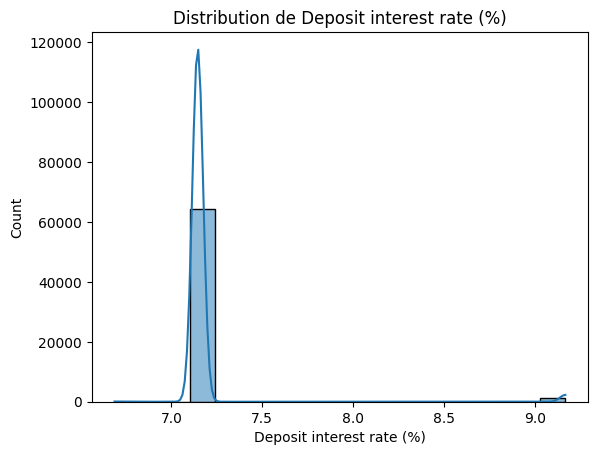

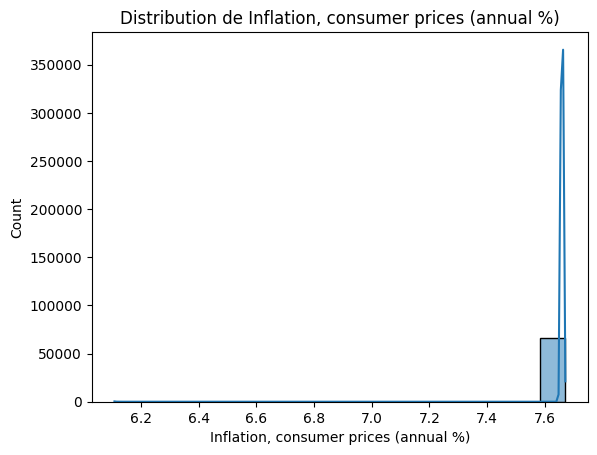

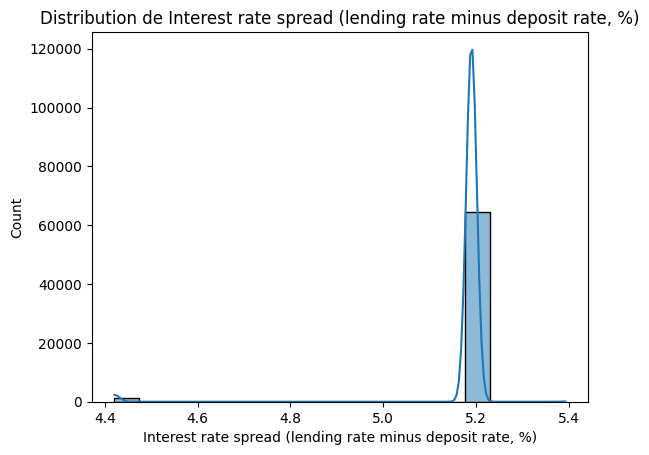

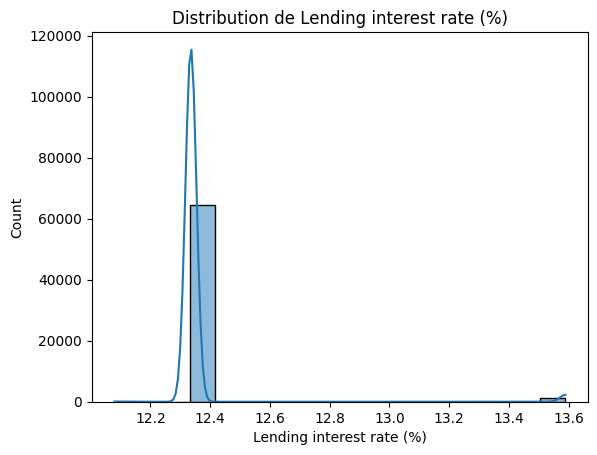

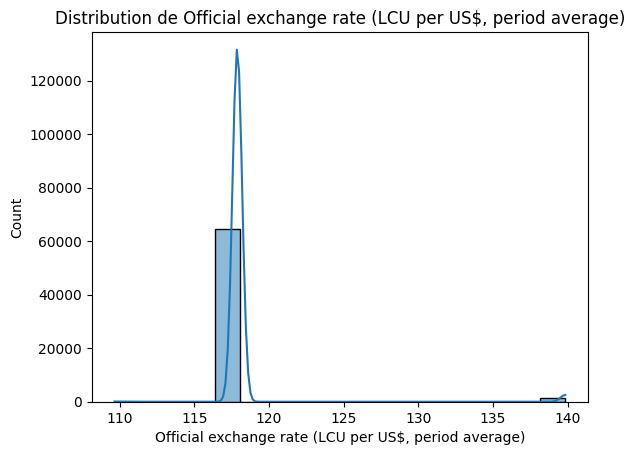

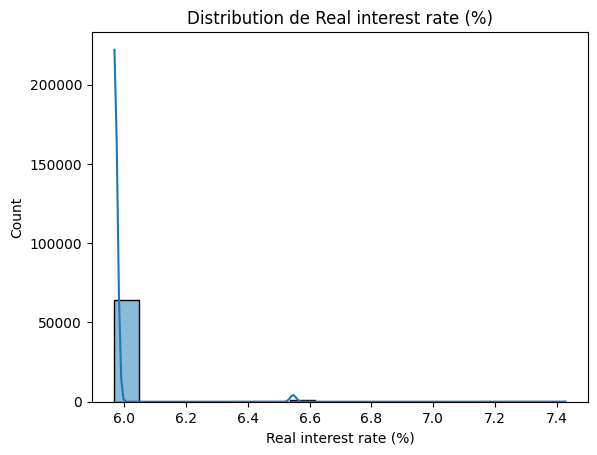

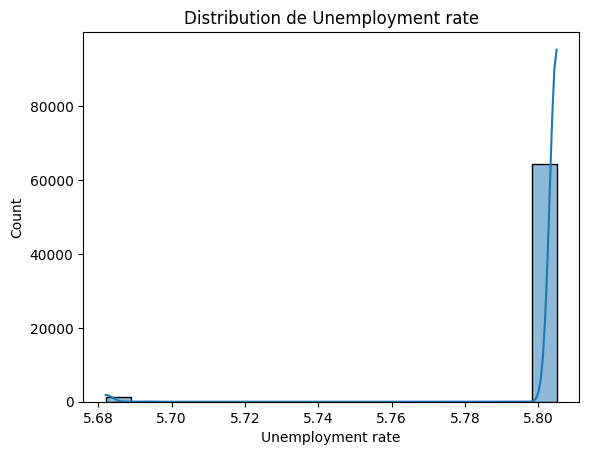

Corrélations avec la cible :
target                                                       1.000000
Real interest rate (%)                                       0.146411
Lending interest rate (%)                                    0.109504
Deposit interest rate (%)                                    0.109070
Official exchange rate (LCU per US$, period average)         0.106157
Inflation, consumer prices (annual %)                       -0.099350
Interest rate spread (lending rate minus deposit rate, %)   -0.108361
Unemployment rate                                           -0.128746
Name: target, dtype: float64


In [17]:
economic_features = [
    'Deposit interest rate (%)', 'Inflation, consumer prices (annual %)',
    'Interest rate spread (lending rate minus deposit rate, %)',
    'Lending interest rate (%)', 'Official exchange rate (LCU per US$, period average)',
    'Real interest rate (%)', 'Unemployment rate'
]

for feature in economic_features:
    sns.histplot(train_df[feature], kde=True)
    plt.title(f"Distribution de {feature}")
    plt.show()

corr_with_target = train_df[economic_features + ['target']].corr()['target'].sort_values(ascending=False)
print("Corrélations avec la cible :")
print(corr_with_target)


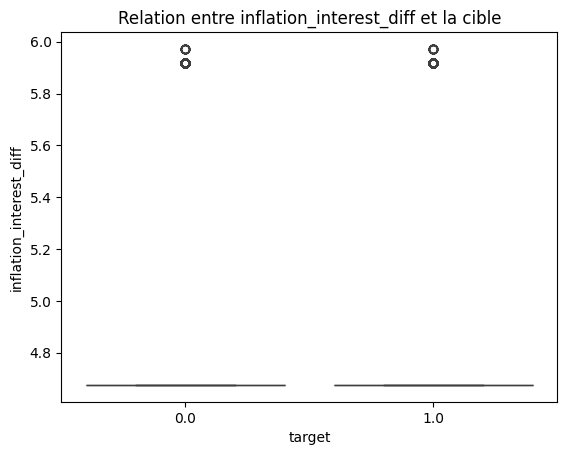

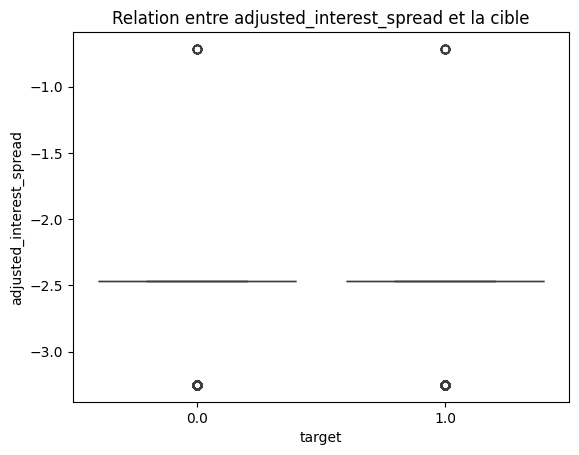

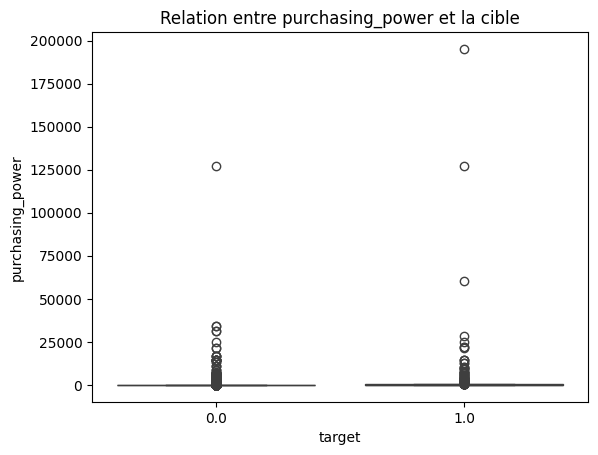

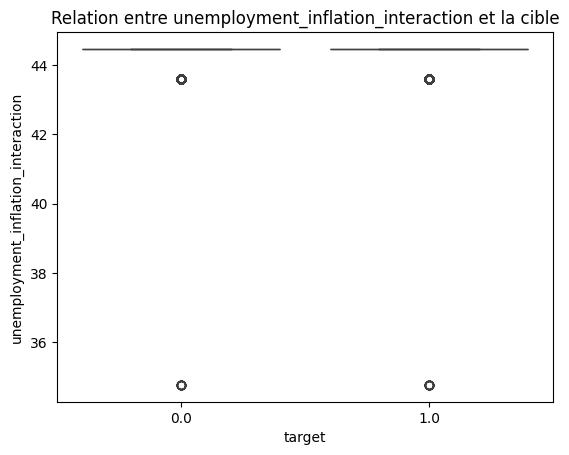

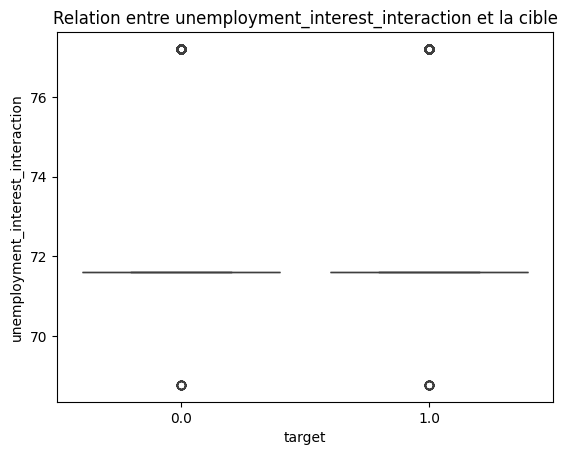

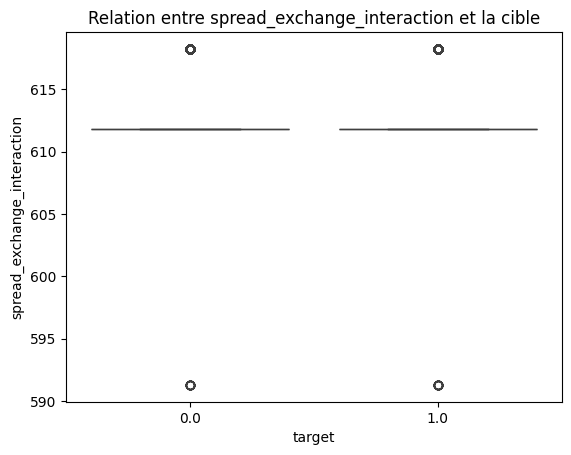

Corrélations des nouvelles features avec la cible :
target                                1.000000
inflation_interest_diff               0.130685
unemployment_interest_interaction     0.103494
purchasing_power                      0.089335
spread_exchange_interaction           0.046740
adjusted_interest_spread             -0.066306
unemployment_inflation_interaction   -0.144301
Name: target, dtype: float64


In [26]:
#new features

train_df['inflation_interest_diff'] = train_df['Lending interest rate (%)'] - train_df['Inflation, consumer prices (annual %)'] # : Inclure cette variable dans le modèle.
test_df['inflation_interest_diff'] = test_df['Lending interest rate (%)'] - test_df['Inflation, consumer prices (annual %)']

train_df['adjusted_interest_spread'] = train_df['Interest rate spread (lending rate minus deposit rate, %)'] - train_df['Inflation, consumer prices (annual %)'] # Inclure uniquement si elle ajoute de la valeur au modèle.
test_df['adjusted_interest_spread'] = test_df['Interest rate spread (lending rate minus deposit rate, %)'] - test_df['Inflation, consumer prices (annual %)']


train_df['purchasing_power'] = train_df['Total_Amount'] / train_df['Official exchange rate (LCU per US$, period average)'] #Inclure et tester son influence dans le modèle.
test_df['purchasing_power'] = test_df['Total_Amount'] / test_df['Official exchange rate (LCU per US$, period average)']

train_df['unemployment_inflation_interaction'] = train_df['Unemployment rate'] * train_df['Inflation, consumer prices (annual %)'] #Inclure dans le modèle, car elle est informativement riche.
test_df['unemployment_inflation_interaction'] = test_df['Unemployment rate'] * test_df['Inflation, consumer prices (annual %)']

train_df['unemployment_interest_interaction'] = train_df['Unemployment rate'] * train_df['Lending interest rate (%)'] #Tester son impact dans le modèle.
test_df['unemployment_interest_interaction'] = test_df['Unemployment rate'] * test_df['Lending interest rate (%)']

train_df['spread_exchange_interaction'] = train_df['Interest rate spread (lending rate minus deposit rate, %)'] * train_df['Official exchange rate (LCU per US$, period average)'] # Tester cette variable comme feature secondaire.
test_df['spread_exchange_interaction'] = test_df['Interest rate spread (lending rate minus deposit rate, %)'] * test_df['Official exchange rate (LCU per US$, period average)']


new_features = ['inflation_interest_diff', 'adjusted_interest_spread', 'purchasing_power',
                'unemployment_inflation_interaction', 'unemployment_interest_interaction', 'spread_exchange_interaction']

for feature in new_features:
    sns.boxplot(x='target', y=feature, data=train_df)
    plt.title(f"Relation entre {feature} et la cible")
    plt.show()

corr_with_target_new = train_df[new_features + ['target']].corr()['target'].sort_values(ascending=False)
print("Corrélations des nouvelles features avec la cible :")
print(corr_with_target_new)


In [19]:
from scipy.stats import ttest_ind

for feature in new_features:
    class_0 = train_df[train_df['target'] == 0][feature].dropna()
    class_1 = train_df[train_df['target'] == 1][feature].dropna()

    t_stat, p_val = ttest_ind(class_0, class_1)
    print(f"{feature}: t-stat={t_stat}, p-value={p_val}")


inflation_interest_diff: t-stat=-33.78234352435848, p-value=4.8570986890249596e-248
adjusted_interest_spread: t-stat=17.030613918268273, p-value=6.715098200797532e-65
purchasing_power: t-stat=-22.987171073101283, p-value=1.8100253006250656e-116
unemployment_inflation_interaction: t-stat=37.37329006653499, p-value=1.6232838441323998e-302
unemployment_interest_interaction: t-stat=-26.667118159153063, p-value=7.702222250275096e-156
spread_exchange_interaction: t-stat=-11.991981697479419, p-value=4.2389660173458915e-33


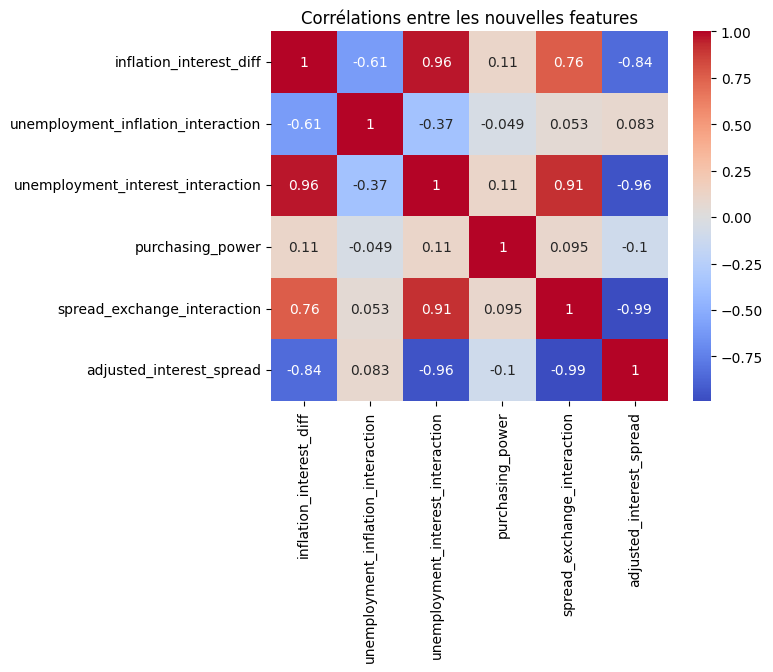

In [27]:
selected_features = [
    'inflation_interest_diff', 'unemployment_inflation_interaction',
    'unemployment_interest_interaction', 'purchasing_power',
    'spread_exchange_interaction', 'adjusted_interest_spread'
]
sns.heatmap(train_df[selected_features].corr(), annot=True, cmap="coolwarm")
plt.title("Corrélations entre les nouvelles features")
plt.show()


In [28]:
from sklearn.impute import KNNImputer
num_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")
train_df[num_cols] = knn_imputer.fit_transform(train_df[num_cols])

# Vérifiez si les NaN ont disparu
print("\nValeurs manquantes après KNN Imputer :")
print(train_df.isnull().sum())



Valeurs manquantes après KNN Imputer :
ID                                    0
customer_id                           0
country_id                            0
tbl_loan_id                           0
lender_id                             0
                                     ..
adjusted_interest_spread              0
purchasing_power                      0
unemployment_inflation_interaction    0
unemployment_interest_interaction     0
spread_exchange_interaction           0
Length: 68, dtype: int64


In [22]:
from sklearn.feature_selection import mutual_info_classif

# Mutual information entre les deux variables candidates et la cible
mi_scores = mutual_info_classif(
    train_df[['spread_exchange_interaction', 'adjusted_interest_spread']], 
    train_df['target']
)
print("Mutual Information Scores:")
print(pd.Series(mi_scores, index=['spread_exchange_interaction', 'adjusted_interest_spread']))

# Même logique pour inflation_interest_diff et unemployment_interest_interaction
mi_scores_2 = mutual_info_classif(
    train_df[['inflation_interest_diff', 'unemployment_interest_interaction']], 
    train_df['target']
)
print("\nMutual Information Scores (2ème set):")
print(pd.Series(mi_scores_2, index=['inflation_interest_diff', 'unemployment_interest_interaction']))


Mutual Information Scores:
spread_exchange_interaction    0.019640
adjusted_interest_spread       0.017325
dtype: float64

Mutual Information Scores (2ème set):
inflation_interest_diff              0.025810
unemployment_interest_interaction    0.016921
dtype: float64


In [29]:
from scipy.stats import f_oneway

# ANOVA entre spread_exchange_interaction et adjusted_interest_spread avec target
anova_result = f_oneway(
    train_df.loc[train_df['target'] == 0, 'spread_exchange_interaction'],
    train_df.loc[train_df['target'] == 1, 'spread_exchange_interaction']
)

anova_result_2 = f_oneway(
    train_df.loc[train_df['target'] == 0, 'adjusted_interest_spread'],
    train_df.loc[train_df['target'] == 1, 'adjusted_interest_spread']
)

print("ANOVA results for spread_exchange_interaction:", anova_result)
print("ANOVA results for adjusted_interest_spread:", anova_result_2)

# Même logique pour inflation_interest_diff et unemployment_interest_interaction
anova_result_3 = f_oneway(
    train_df.loc[train_df['target'] == 0, 'inflation_interest_diff'],
    train_df.loc[train_df['target'] == 1, 'inflation_interest_diff']
)

anova_result_4 = f_oneway(
    train_df.loc[train_df['target'] == 0, 'unemployment_interest_interaction'],
    train_df.loc[train_df['target'] == 1, 'unemployment_interest_interaction']
)

print("\nANOVA results for inflation_interest_diff:", anova_result_3)
print("ANOVA results for unemployment_interest_interaction:", anova_result_4)

#on garde adjusted_interest_spread à la place de spread_exchange_interaction
#on garde inflation_interest_diff à la place de unemployment_interest_interaction
train_df.drop(columns=['spread_exchange_interaction', 'unemployment_interest_interaction'], inplace=True, errors='ignore')
test_df.drop(columns=['spread_exchange_interaction', 'unemployment_interest_interaction'], inplace=True, errors='ignore')
train_df.head()


ANOVA results for spread_exchange_interaction: F_onewayResult(statistic=918.8962847150766, pvalue=1.6237094527112516e-200)
ANOVA results for adjusted_interest_spread: F_onewayResult(statistic=1125.5660041881217, pvalue=8.867933839841044e-245)

ANOVA results for inflation_interest_diff: F_onewayResult(statistic=1847.1042261436835, pvalue=0.0)
ANOVA results for unemployment_interest_interaction: F_onewayResult(statistic=1524.047750473075, pvalue=0.0)


,ID,customer_id,country_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,...,"Inflation, consumer prices (annual %)","Interest rate spread (lending rate minus deposit rate, %)",Lending interest rate (%),"Official exchange rate (LCU per US$, period average)",Real interest rate (%),Unemployment rate,inflation_interest_diff,adjusted_interest_spread,purchasing_power,unemployment_inflation_interaction
0,ID_266671248032267278,266671.0,1,248032.0,267278.0,8448.0,8448.0,2022-08-30,2022-09-06,7.0,...,7.659863,5.190665,12.335841,117.865989,5.968447,5.805,4.675978,-2.469197,71.674620,44.465503
1,ID_248919228515267278,248919.0,1,228515.0,267278.0,25895.0,25979.0,2022-07-30,2022-08-06,7.0,...,7.659863,5.190665,12.335841,117.865989,5.968447,5.805,4.675978,-2.469197,219.698661,44.465503
2,ID_308486370501251804,308486.0,1,370501.0,251804.0,6900.0,7142.0,2024-09-06,2024-09-13,7.0,...,7.671396,4.420812,13.588502,139.846384,6.546517,5.682,5.917105,-3.250585,45.239640,43.588874
3,ID_266004285009267278,266004.0,1,285009.0,267278.0,8958.0,9233.0,2022-10-20,2022-10-27,7.0,...,7.659863,5.190665,12.335841,117.865989,5.968447,5.805,4.675978,-2.469197,76.001568,44.465503
4,ID_253803305312267278,253803.0,1,305312.0,267278.0,4564.0,4728.0,2022-11-28,2022-12-05,7.0,...,7.659863,5.190665,12.335841,117.865989,5.968447,5.805,4.675978,-2.469197,38.721942,44.465503


#### Nettoyage du dataset avec les nouvelles features (basiques + ratios + economic_dataset) pour le modèle

Noms de colonnes après nettoyage : Index(['ID', 'customer_id', 'country_id', 'tbl_loan_id', 'lender_id',
       'Total_Amount', 'Total_Amount_to_Repay', 'disbursement_date',
       'due_date', 'duration', 'New_versus_Repeat', 'Amount_Funded_By_Lender',
       'Lender_portion_Funded', 'Lender_portion_to_be_repaid', 'target',
       'disbursement_date_month', 'disbursement_date_day',
       'disbursement_date_year', 'loan_term_days', 'disbursement_weekday',
       'due_weekday', 'due_date_month', 'due_date_day', 'due_date_year',
       'repayment_ratio', 'log_Total_Amount', 'loan_type_Type_1',
       'loan_type_Type_10', 'loan_type_Type_11', 'loan_type_Type_12',
       'loan_type_Type_13', 'loan_type_Type_14', 'loan_type_Type_15',
       'loan_type_Type_16', 'loan_type_Type_17', 'loan_type_Type_18',
       'loan_type_Type_19', 'loan_type_Type_2', 'loan_type_Type_20',
       'loan_type_Type_21', 'loan_type_Type_22', 'loan_type_Type_23',
       'loan_type_Type_24', 'loan_type_Type_3', 'loa

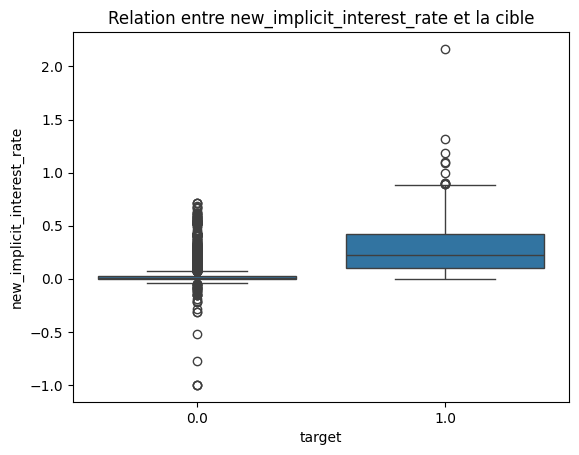

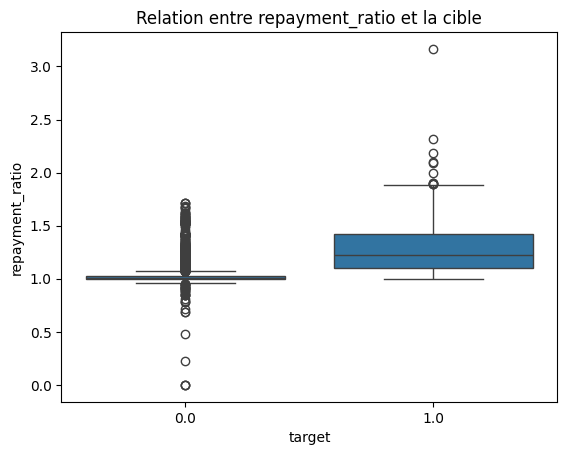

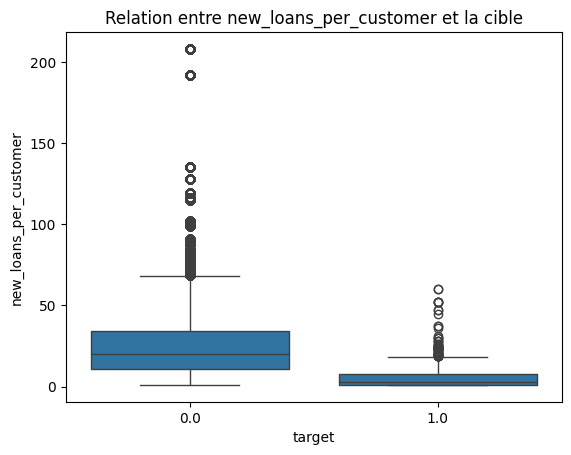


Résumé des données après nettoyage (train_df) :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 66 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   ID                                                         68654 non-null  object        
 1   customer_id                                                68654 non-null  float64       
 2   country_id                                                 68654 non-null  int32         
 3   tbl_loan_id                                                68654 non-null  float64       
 4   lender_id                                                  68654 non-null  float64       
 5   Total_Amount                                               68654 non-null  float64       
 6   Total_Amount_to_Repay                                      68654 non-null  fl

In [30]:
# Nettoyer les noms de colonnes
train_df.columns = train_df.columns.str.replace(r"[ ,%()]", "_", regex=True)
test_df.columns = test_df.columns.str.replace(r"[ ,%()]", "_", regex=True)

# Vérifiez les nouvelles colonnes
print("Noms de colonnes après nettoyage :", train_df.columns)



# Étape 4 : Analyse de corrélation
print("\nTop 15 features corrélées avec la cible dans train_df :")

# Sélectionner uniquement les colonnes numériques
numerical_cols = train_df.select_dtypes(include=[np.number])

# Calculer la matrice de corrélation uniquement pour les colonnes numériques
correlation_matrix = numerical_cols.corr()

# Trier les features les plus corrélées avec la cible (target)
correlated_features = correlation_matrix['target'].abs().sort_values(ascending=False).head(15)

print(correlated_features)


# Étape 5 : Visualisation des relations avec la cible
important_vars = ['new_implicit_interest_rate', 'repayment_ratio', 'new_loans_per_customer']
for var in important_vars:
    sns.boxplot(x='target', y=var, data=train_df)
    plt.title(f"Relation entre {var} et la cible")
    plt.show()

# Étape 6 : Vérification finale et export
print("\nRésumé des données après nettoyage (train_df) :")
print(train_df.info())
print("\nRésumé des données après nettoyage (test_df) :")
print(test_df.info())


In [31]:
train_df = train_df.drop(columns=['disbursement_date', 'due_date'], errors='ignore')
test_df = test_df.drop(columns=['disbursement_date', 'due_date'], errors='ignore')
# Mise à jour de la liste de features
features_for_modelling = [
    col for col in train_df.columns if col not in ['ID', 'target']
]
print(features_for_modelling)

['customer_id', 'country_id', 'tbl_loan_id', 'lender_id', 'Total_Amount', 'Total_Amount_to_Repay', 'duration', 'New_versus_Repeat', 'Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_portion_to_be_repaid', 'disbursement_date_month', 'disbursement_date_day', 'disbursement_date_year', 'loan_term_days', 'disbursement_weekday', 'due_weekday', 'due_date_month', 'due_date_day', 'due_date_year', 'repayment_ratio', 'log_Total_Amount', 'loan_type_Type_1', 'loan_type_Type_10', 'loan_type_Type_11', 'loan_type_Type_12', 'loan_type_Type_13', 'loan_type_Type_14', 'loan_type_Type_15', 'loan_type_Type_16', 'loan_type_Type_17', 'loan_type_Type_18', 'loan_type_Type_19', 'loan_type_Type_2', 'loan_type_Type_20', 'loan_type_Type_21', 'loan_type_Type_22', 'loan_type_Type_23', 'loan_type_Type_24', 'loan_type_Type_3', 'loan_type_Type_4', 'loan_type_Type_5', 'loan_type_Type_6', 'loan_type_Type_7', 'loan_type_Type_8', 'loan_type_Type_9', 'new_implicit_interest_rate', 'new_loans_per_customer', 'new_tota

### CROSS VALIDATION
* Here we are going to use a simple train test split but due to the imbalance try other robust methods like StratifiedKFold


In [59]:
# Create stratified train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(
    train_df[features_for_modelling], 
    train['target'], 
    stratify=train['target'], 
    random_state=42,
    test_size=0.2
)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(54923, 62) (13731, 62) (54923,) (13731,)


## Initialisation & Model Training

[I 2025-01-01 22:37:12,481] A new study created in memory with name: no-name-82ff593b-e113-4ccf-903c-fe0906a57ef6
[I 2025-01-01 22:51:42,780] Trial 0 finished with value: 0.8625954198473282 and parameters: {'resampling_method': 'BorderlineSMOTE', 'algo': 'xgboost', 'booster_type': 'dart', 'n_estimators': 350, 'max_depth': 7, 'learning_rate': 0.09894723186295444, 'subsample': 0.8322762015679404, 'colsample_bytree': 0.695142172005854, 'gamma': 0.1156893762544906, 'min_child_weight': 3}. Best is trial 0 with value: 0.8625954198473282.


[LightGBM] [Warning] feature_fraction is set=0.9145799500355604, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9145799500355604
[LightGBM] [Warning] lambda_l1 is set=0.3090234822569313, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3090234822569313
[LightGBM] [Warning] lambda_l2 is set=0.20164055754859078, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20164055754859078
[LightGBM] [Warning] bagging_fraction is set=0.7460371280535332, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7460371280535332
[LightGBM] [Warning] feature_fraction is set=0.9145799500355604, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9145799500355604
[LightGBM] [Warning] lambda_l1 is set=0.3090234822569313, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3090234822569313
[LightGBM] [Warning] lambda_l2 is set=0.20164055754859078, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20164055754859078
[LightG

[I 2025-01-01 22:51:43,958] Trial 1 finished with value: 0.8348134991119005 and parameters: {'resampling_method': 'BorderlineSMOTE', 'algo': 'lightgbm', 'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.05725593737074046, 'num_leaves': 80, 'feature_fraction': 0.9145799500355604, 'bagging_fraction': 0.7460371280535332, 'lambda_l1': 0.3090234822569313, 'lambda_l2': 0.20164055754859078}. Best is trial 0 with value: 0.8625954198473282.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-01 22:51:48,023] Trial 2 finished with value: 0.4803229061553986 and parameters: {'resampling_method': 'ADASYN', 'algo': 'xgboost', 'booster_type': 'gblinear', 'n_estimators': 350, 'max_depth': 5, 'learning_rate': 0.04421712155708007, 'subsample': 0.653168053828683, 'colsample_bytree': 0.669737302259554, 'gamma': 0.3267387561860068, 'min_child_weight': 3}. Best is trial 0 with value: 0.8625954198473282.
[I 2025-01-01 23:02:08,038] Trial 3 finished with value: 0.8533333333333334 and parameters: {'resampling_method': 'SMOTE', 'algo': 'xgboost', 'booster_type': 'dart', 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.06976199862872813, 'subsample': 0.6891071679960307, 'colsample_bytree': 0.8851747869017323, 'gamma': 0.2262451794899174, 'min_child_weight': 1}. Best is trial 0 with value: 0.8625954198473282.
[I 2025-01-01 23:02:26,739] Trial 4 finished with value: 0.8235294117647058 and parameters: {'resampling_method': 'SMOTETomek', 'algo': 'catboost', 'iterations': 300, 

[LightGBM] [Warning] feature_fraction is set=0.6966949259752375, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6966949259752375
[LightGBM] [Warning] lambda_l1 is set=0.7978485769327217, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7978485769327217
[LightGBM] [Warning] lambda_l2 is set=0.378262325358824, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.378262325358824
[LightGBM] [Warning] bagging_fraction is set=0.9945629742809065, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9945629742809065
[LightGBM] [Warning] feature_fraction is set=0.6966949259752375, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6966949259752375
[LightGBM] [Warning] lambda_l1 is set=0.7978485769327217, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7978485769327217
[LightGBM] [Warning] lambda_l2 is set=0.378262325358824, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.378262325358824
[LightGBM] [War

[I 2025-01-01 23:02:58,716] Trial 8 finished with value: 0.717037037037037 and parameters: {'resampling_method': 'SMOTEENN', 'algo': 'lightgbm', 'n_estimators': 450, 'max_depth': 4, 'learning_rate': 0.030267483037192025, 'num_leaves': 50, 'feature_fraction': 0.6966949259752375, 'bagging_fraction': 0.9945629742809065, 'lambda_l1': 0.7978485769327217, 'lambda_l2': 0.378262325358824}. Best is trial 0 with value: 0.8625954198473282.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.6966949259752375, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6966949259752375
[LightGBM] [Warning] lambda_l1 is set=0.7978485769327217, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7978485769327217
[LightGBM] [Warning] lambda_l2 is set=0.378262325358824, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.378262325358824
[LightGBM] [Warning] bagging_fraction is set=0.9945629742809065, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9945629742809065


[I 2025-01-01 23:05:34,458] Trial 9 finished with value: 0.7752442996742671 and parameters: {'resampling_method': 'BorderlineSMOTE', 'algo': 'xgboost', 'booster_type': 'dart', 'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.07020295395572633, 'subsample': 0.753223039627468, 'colsample_bytree': 0.8428794849621363, 'gamma': 0.06455884145705842, 'min_child_weight': 4}. Best is trial 0 with value: 0.8625954198473282.
[I 2025-01-01 23:05:38,041] Trial 10 finished with value: 0.8604206500956023 and parameters: {'resampling_method': 'BorderlineSMOTE', 'algo': 'xgboost', 'booster_type': 'gbtree', 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.09985077038150886, 'subsample': 0.9569172933478196, 'colsample_bytree': 0.631728012076456, 'gamma': 0.08191536400205963, 'min_child_weight': 2}. Best is trial 0 with value: 0.8625954198473282.
[I 2025-01-01 23:05:41,243] Trial 11 finished with value: 0.859344894026975 and parameters: {'resampling_method': 'BorderlineSMOTE', 'algo': 'xgboo

[LightGBM] [Warning] feature_fraction is set=0.6108229373286186, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6108229373286186
[LightGBM] [Warning] lambda_l1 is set=0.02315165423417609, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02315165423417609
[LightGBM] [Warning] lambda_l2 is set=0.9909545447949867, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9909545447949867
[LightGBM] [Warning] bagging_fraction is set=0.6016558929192072, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6016558929192072
[LightGBM] [Warning] feature_fraction is set=0.6108229373286186, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6108229373286186
[LightGBM] [Warning] lambda_l1 is set=0.02315165423417609, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02315165423417609
[LightGBM] [Warning] lambda_l2 is set=0.9909545447949867, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9909545447949867
[LightG

[I 2025-01-01 23:13:13,749] Trial 16 finished with value: 0.823321554770318 and parameters: {'resampling_method': 'SMOTE', 'algo': 'lightgbm', 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.0908267708390194, 'num_leaves': 20, 'feature_fraction': 0.6108229373286186, 'bagging_fraction': 0.6016558929192072, 'lambda_l1': 0.02315165423417609, 'lambda_l2': 0.9909545447949867}. Best is trial 0 with value: 0.8625954198473282.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.6108229373286186, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6108229373286186
[LightGBM] [Warning] lambda_l1 is set=0.02315165423417609, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02315165423417609
[LightGBM] [Warning] lambda_l2 is set=0.9909545447949867, reg_lambda=0.0 will be ignored. Current value: lambda

[I 2025-01-01 23:13:16,164] Trial 17 finished with value: 0.8185053380782918 and parameters: {'resampling_method': 'BorderlineSMOTE', 'algo': 'xgboost', 'booster_type': 'gbtree', 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.07106618006053689, 'subsample': 0.9988825272450869, 'colsample_bytree': 0.7532653724485169, 'gamma': 0.3034737496813199, 'min_child_weight': 1}. Best is trial 0 with value: 0.8625954198473282.
[I 2025-01-01 23:31:44,535] Trial 18 finished with value: 0.8598848368522073 and parameters: {'resampling_method': 'BorderlineSMOTE', 'algo': 'xgboost', 'booster_type': 'dart', 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.09902405392770003, 'subsample': 0.7664729531843929, 'colsample_bytree': 0.6007358249643022, 'gamma': 0.13635732017544092, 'min_child_weight': 4}. Best is trial 0 with value: 0.8625954198473282.


[LightGBM] [Warning] feature_fraction is set=0.9809257613060838, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9809257613060838
[LightGBM] [Warning] lambda_l1 is set=0.9998332165700947, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9998332165700947
[LightGBM] [Warning] lambda_l2 is set=0.8729003691267805, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8729003691267805
[LightGBM] [Warning] bagging_fraction is set=0.9882943400503303, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9882943400503303
[LightGBM] [Warning] feature_fraction is set=0.9809257613060838, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9809257613060838
[LightGBM] [Warning] lambda_l1 is set=0.9998332165700947, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9998332165700947
[LightGBM] [Warning] lambda_l2 is set=0.8729003691267805, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8729003691267805
[LightGBM] 

[I 2025-01-01 23:31:46,724] Trial 19 finished with value: 0.8582375478927203 and parameters: {'resampling_method': 'BorderlineSMOTE', 'algo': 'lightgbm', 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.07672775234566492, 'num_leaves': 100, 'feature_fraction': 0.9809257613060838, 'bagging_fraction': 0.9882943400503303, 'lambda_l1': 0.9998332165700947, 'lambda_l2': 0.8729003691267805}. Best is trial 0 with value: 0.8625954198473282.


[LightGBM] [Warning] feature_fraction is set=0.9809257613060838, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9809257613060838
[LightGBM] [Warning] lambda_l1 is set=0.9998332165700947, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9998332165700947
[LightGBM] [Warning] lambda_l2 is set=0.8729003691267805, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8729003691267805
[LightGBM] [Warning] bagging_fraction is set=0.9882943400503303, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9882943400503303
Best trial F1 Score: 0.8625954198473282
Best Hyperparameters: {'resampling_method': 'BorderlineSMOTE', 'algo': 'xgboost', 'booster_type': 'dart', 'n_estimators': 350, 'max_depth': 7, 'learning_rate': 0.09894723186295444, 'subsample': 0.8322762015679404, 'colsample_bytree': 0.695142172005854, 'gamma': 0.1156893762544906, 'min_child_weight': 3}

Final F1 Score on validation: 0.8582

Classification Report:
               precision 

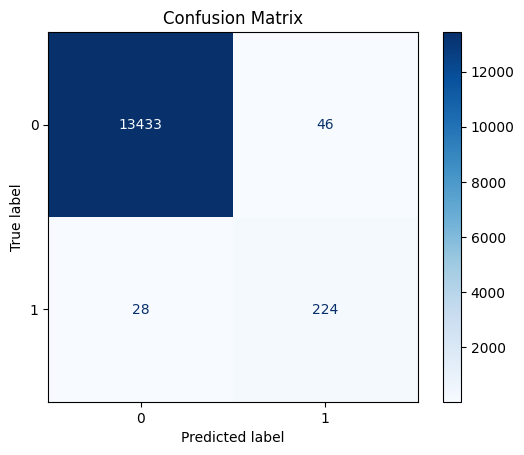

In [60]:
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Modèles
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Méthodes de rééchantillonnage
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN

# ======= Données (exemple) =======
# Supposons que vous avez déjà défini X, y
# et un split train/validation:
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, ...)

# ======= Mapping des méthodes de rééchantillonnage =======
resampling_methods = {
    "No_Resampling": None,
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
}


def objective(trial):
    """
    Optuna objective function for hyperparameter optimization.
    - Choix de la méthode de rééchantillonnage (resampling_method)
    - Choix du modèle (algo)
    - Choix des hyperparamètres du modèle
    Retourne un f1_score sur (X_valid, y_valid).
    """

    # ============== 1) Choix de la méthode de rééchantillonnage ==============
    resampling_method_name = trial.suggest_categorical(
        "resampling_method", list(resampling_methods.keys())
    )
    resampler = resampling_methods[resampling_method_name]

    if resampler is not None:
        X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
    else:
        X_train_resampled, y_train_resampled = X_train, y_train

    # ============== 2) Choix du modèle (algo) ==============
    algo = trial.suggest_categorical("algo", ["xgboost", "lightgbm", "catboost"])

    if algo == "xgboost":
        booster_type = trial.suggest_categorical("booster_type", ["gbtree", "gblinear", "dart"])
        params = {
            "booster": booster_type,
            "n_estimators": trial.suggest_int("n_estimators", 100, 500, step=50),
            "max_depth": trial.suggest_int("max_depth", 3, 8),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
            "subsample": trial.suggest_float("subsample", 0.6, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
            "gamma": trial.suggest_float("gamma", 0, 0.5),
            "min_child_weight": trial.suggest_int("min_child_weight", 1, 5),
            "random_state": 42,
            "n_jobs": -1,
            "use_label_encoder": False,
            "eval_metric": "logloss",
        }
        model = XGBClassifier(**params)

    elif algo == "lightgbm":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 100, 500, step=50),
            "max_depth": trial.suggest_int("max_depth", 3, 8),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
            "num_leaves": trial.suggest_int("num_leaves", 20, 100, step=10),
            "feature_fraction": trial.suggest_float("feature_fraction", 0.6, 1.0),
            "bagging_fraction": trial.suggest_float("bagging_fraction", 0.6, 1.0),
            "lambda_l1": trial.suggest_float("lambda_l1", 0, 1),
            "lambda_l2": trial.suggest_float("lambda_l2", 0, 1),
            "random_state": 42,
            "n_jobs": -1,
        }
        model = LGBMClassifier(**params)

    else:  # catboost
        params = {
            "iterations": trial.suggest_int("iterations", 100, 500, step=50),
            "depth": trial.suggest_int("depth", 3, 8),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
            "random_state": 42,
            "verbose": 0,
        }
        model = CatBoostClassifier(**params)

    # ============== 3) Entraînement du modèle ==============
    model.fit(X_train_resampled, y_train_resampled)

    # ============== 4) Évaluation ==============
    y_pred = model.predict(X_valid)
    score_f1 = f1_score(y_valid, y_pred)
    return score_f1


# ============== Lancement de l'optimisation ==============
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

# ============== Affichage des meilleurs hyperparamètres ==============
best_params = study.best_params
print("Best trial F1 Score:", study.best_trial.value)
print("Best Hyperparameters:", best_params)

# ============== Récupération et création du modèle final ==============
# Retrait de la clé "resampling_method"
resampling_method_name = best_params.pop("resampling_method")
best_resampler = resampling_methods[resampling_method_name]

algo = best_params.pop("algo")  # xgboost / lightgbm / catboost
if algo == "xgboost":
    final_model = XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric="logloss")
elif algo == "lightgbm":
    final_model = LGBMClassifier(**best_params, random_state=42)
else:
    final_model = CatBoostClassifier(**best_params, random_state=42, verbose=0)

# ============== Application de la méthode de rééchantillonnage optimale ==============
if best_resampler is not None:
    X_train_resampled, y_train_resampled = best_resampler.fit_resample(X_train, y_train)
else:
    X_train_resampled, y_train_resampled = X_train, y_train

# ============== Entraînement du modèle final ==============
final_model.fit(X_train_resampled, y_train_resampled)

# ============== Évaluation sur le set de validation ==============
y_pred = final_model.predict(X_valid)
f1 = f1_score(y_valid, y_pred)
print(f"\nFinal F1 Score on validation: {f1:.4f}")

print("\nClassification Report:\n", classification_report(y_valid, y_pred))

ConfusionMatrixDisplay.from_predictions(
    y_valid,
    y_pred,
    display_labels=final_model.classes_,
    cmap=plt.cm.Blues
)
plt.title("Confusion Matrix")
plt.show()


In [1]:
feature_importances = final_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features_for_modelling,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances')
plt.show()

NameError: name 'final_model' is not defined

### FEATURE IMPORTANCE

In [62]:
# Generate predictions for test set
test_predictions = final_model.predict(test_df[features_for_modelling])
test_predictions_proba = final_model.predict_proba(test_df[features_for_modelling])[:, 1]

# Create submission dataframe
test_df['target'] = test_predictions
sub = test_df[['ID', 'target']]
sub.head()

,ID,target
0,ID_269404226088267278,0
1,ID_255356300042267278,0
2,ID_257026243764267278,0
3,ID_264617299409267278,0
4,ID_247613296713267278,0


## Model Prediction & Inference

In [63]:
sub.to_csv('baseline_submission8.csv', index=False)

train['target].value_counts()